In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# Set random seed for everything (except sklearn)
RND_SEED: int = 12345
np.random.seed(RND_SEED) # for numpy, scipy
pd.core.common.random_state(RND_SEED) # for pandas

# Resolution for graph images
WIDTH: int = 1366
HEIGHT: int = 768

In [3]:
df = pd.read_csv("./../../data/Combined-2023.csv", encoding="utf-8", index_col=[0])
df["streams"] = df["streams"].astype(str).apply(lambda x: float(x) / 1e6 if x.isdigit() else np.nan)
df["in_deezer_playlists"] = df["in_deezer_playlists"].astype(str).apply(lambda x: float(x.replace(",", "")) / 1000)
df["in_shazam_charts"] = df["in_shazam_charts"].astype(str).apply(
    lambda x: int(float(x.replace(",", ""))) if x.replace(",", "").replace(",", "").isdigit() else pd.NA
).astype("Int64")
df["key"] = df["key"].astype("category")
df["mode"] = df["mode"].astype("category")

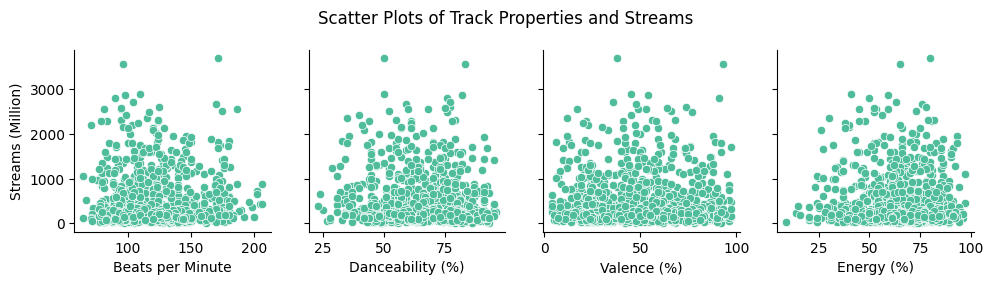

In [4]:
pair_grid = sns.PairGrid(df, x_vars=["bpm", "danceability_%", "valence_%", "energy_%"], y_vars=["streams"])
fig = pair_grid.map(sns.scatterplot, color="#4FBD9C")
fig.x_vars = ["Beats per Minute", "Danceability (%)", "Valence (%)", "Energy (%)"]
fig.y_vars = ["Streams (Million)"]
fig._add_axis_labels()
fig.figure.suptitle("Scatter Plots of Track Properties and Streams", y=1.1)
fig.figure.savefig("./../../images/2023/scatter-streams-1.png", bbox_inches="tight")

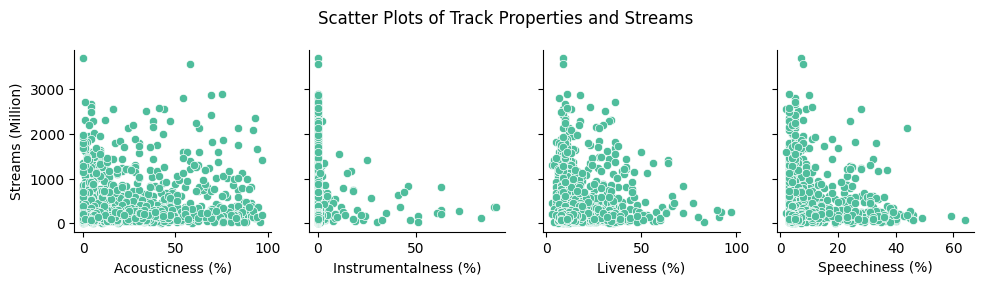

In [5]:
pair_grid = sns.PairGrid(df, x_vars=[
    "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"
], y_vars=["streams"])
fig = pair_grid.map(sns.scatterplot, color="#4FBD9C")
fig.x_vars = ["Acousticness (%)", "Instrumentalness (%)", "Liveness (%)", "Speechiness (%)"]
fig.y_vars = ["Streams (Million)"]
fig._add_axis_labels()
fig.figure.suptitle("Scatter Plots of Track Properties and Streams", y=1.1)
fig.figure.savefig("./../../images/2023/scatter-streams-2.png", bbox_inches="tight")